# Predicting Coronavirus Outbreak and Recovering Rate with FB Prophet


The number of confirmed novel coronavirus cases worlwide has reached 1,213,194 & death toll has reached to 65,600 as of 5th April 2020.In order to predict the coronavirus cases worldwide we have used FB Prophet for forecasting.

In [1]:
# Importing all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading datasets
df=pd.read_csv('D:\\Data Science\\Projects\\Covid-19\\covid_19_data.csv')
glb_cnf=pd.read_csv('D:\\Data Science\\Projects\\Covid-19\\time_series_covid19_confirmed_global.csv')
glb_death=pd.read_csv('D:\\Data Science\\Projects\\Covid-19\\time_series_covid19_deaths_global.csv')
glb_recover=pd.read_csv('D:\\Data Science\\Projects\\Covid-19\\time_series_covid19_recovered_global.csv')

# Preprocessing the complete data


In [3]:
df.head()

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,1/22/2020,Mainland China,1,0,0
1,1/22/2020,Mainland China,14,0,0
2,1/22/2020,Mainland China,6,0,0
3,1/22/2020,Mainland China,1,0,0
4,1/22/2020,Mainland China,0,0,0


In [4]:
# rename columns
df.rename(columns={'Country/Region':'Region','ObservationDate':'Date'},inplace=True)

In [5]:
# convert to datetime
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)


In [6]:
df.tail()

,Region,Confirmed,Deaths,Recovered
Date,,,,
2020-04-03,US,162,0,0
2020-04-03,Mainland China,76,3,73
2020-04-03,Canada,6,0,0
2020-04-03,Mainland China,184,2,172
2020-04-03,Mainland China,1260,1,1228


Preprocessing Global Confirmed cases data for intrested countries


In [7]:
glb_cnf.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,84,94,110,110,120,170,174,237,273,281
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,146,174,186,197,212,223,243,259,277,304
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,302,367,409,454,511,584,716,847,986,1171
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,188,224,267,308,334,370,376,390,428,439
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,4,4,5,7,7,7,8,8,8


In [8]:
# Checking for missing values
glb_cnf.isna().sum()

Province/State    178
Country/Region      0
Lat                 0
Long                0
1/22/20             0
1/23/20             0
1/24/20             0
1/25/20             0
1/26/20             0
1/27/20             0
1/28/20             0
1/29/20             0
1/30/20             0
1/31/20             0
2/1/20              0
2/2/20              0
2/3/20              0
2/4/20              0
2/5/20              0
2/6/20              0
2/7/20              0
2/8/20              0
2/9/20              0
2/10/20             0
2/11/20             0
2/12/20             0
2/13/20             0
2/14/20             0
2/15/20             0
2/16/20             0
                 ... 
3/5/20              0
3/6/20              0
3/7/20              0
3/8/20              0
3/9/20              0
3/10/20             0
3/11/20             0
3/12/20             0
3/13/20             0
3/14/20             0
3/15/20             0
3/16/20             0
3/17/20             0
3/18/20             0
3/19/20   

In [9]:
# As Province/State has lot of missing values we need to drop this column from all the datasets
glb_cnf.drop(['Province/State','Lat','Long'],axis=1,inplace=True)
glb_cnf.rename(columns= {'Country/Region':'Region'},inplace= True)

In [10]:
glb_cnf['Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

In [11]:
# Creating new dataframe for the countries we are intrested in.
countries = ['India','Iran','Italy','Spain','Germany','US']
cnf= glb_cnf[glb_cnf.Region.isin(countries)]
# Transposing/Pivoting the dataframe
cnf_T=cnf.T
cnf_T.head()


,120,131,133,137,201,225
Region,Germany,India,Iran,Italy,Spain,US
1/22/20,0,0,0,0,0,1
1/23/20,0,0,0,0,0,1
1/24/20,0,0,0,0,0,2
1/25/20,0,0,0,0,0,2


In [12]:
# Rename Columns 
cnf_T.rename(columns= {131:'India',137:'Italy',133:'Iran',120:'Germany',201:'Spain',225:'US'},inplace= True)

# drop first row 
cnf_T.drop(cnf_T.index[0],inplace=True)

# name Index 
cnf_T.index.name='DATE'
cnf_T.head()

,Germany,India,Iran,Italy,Spain,US
DATE,,,,,,
1/22/20,0,0,0,0,0,1
1/23/20,0,0,0,0,0,1
1/24/20,0,0,0,0,0,2
1/25/20,0,0,0,0,0,2
1/26/20,0,0,0,0,0,5


Preprocessing Global Recovered cases data for intrested countries


In [13]:
glb_recover.drop(['Province/State','Lat','Long'],axis=1,inplace=True)
glb_recover.rename(columns= {'Country/Region':'Region'},inplace= True)

In [14]:
rec= glb_recover[glb_recover.Region.isin(countries)]
rec_T=rec.T
rec_T.head()

,112,125,127,131,199,225
Region,Germany,India,Iran,Italy,Spain,US
1/22/20,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0


In [15]:
# Rename Columns 
rec_T.rename(columns= {125:'India',131:'Italy',127:'Iran',112:'Germany',199:'Spain',225:'US'},inplace= True)

# drop first row 
rec_T.drop(rec_T.index[0],inplace=True)

# name Index 
rec_T.index.name='DATE'
rec_T.head()

,Germany,India,Iran,Italy,Spain,US
DATE,,,,,,
1/22/20,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0


Preprocessing Global Deaths cases data for intrested countries

In [16]:
glb_death.drop(['Province/State','Lat','Long'],axis=1,inplace=True)
glb_death.rename(columns= {'Country/Region':'Region'},inplace= True)

In [17]:
dth= glb_death[glb_death.Region.isin(countries)]
dth_T=dth.T
dth_T.head()

,120,131,133,137,201,225
Region,Germany,India,Iran,Italy,Spain,US
1/22/20,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0


In [18]:
# Rename Columns 
dth_T.rename(columns= {131:'India',137:'Italy',133:'Iran',120:'Germany',201:'Spain',225:'US'},inplace= True)

# drop first row 
dth_T.drop(dth_T.index[0],inplace=True)

# name Index 
dth_T.index.name='DATE'
dth_T.head()

,Germany,India,Iran,Italy,Spain,US
DATE,,,,,,
1/22/20,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0


# Data Visualization & EDA

Total Number of confirmed cases in each country as of 3-4-2020

In [19]:
df.groupby('Region')['Confirmed','Deaths','Recovered'].max()

,Confirmed,Deaths,Recovered
Region,,,
Azerbaijan,1,0,0
"('St. Martin',)",2,0,0
Afghanistan,281,6,10
Albania,304,17,89
Algeria,1171,105,65
Andorra,439,16,16
Angola,8,2,1
Antigua and Barbuda,15,0,0
Argentina,1265,39,266


In [20]:
print('Total number of countries affected as of 3-4-2020 : ')  
len(df['Region'].unique())

Total number of countries affected as of 3-4-2020 : 


216

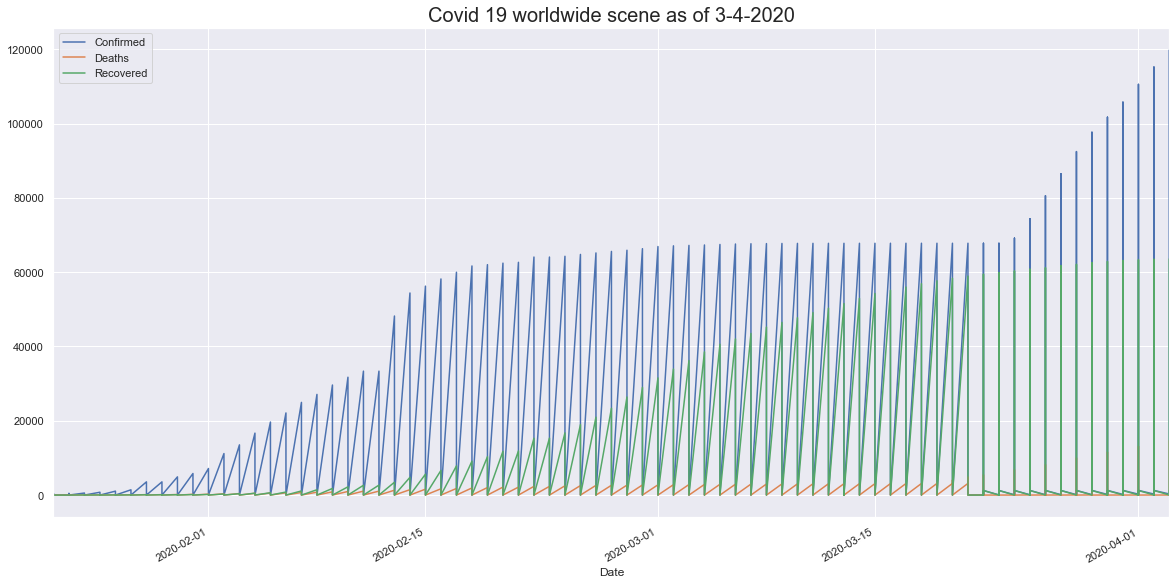

In [21]:
df[['Confirmed', 'Deaths', 'Recovered']].plot(kind='line',figsize=(20,10))
plt.title('Covid 19 worldwide scene as of 3-4-2020',fontsize=20)
plt.show()

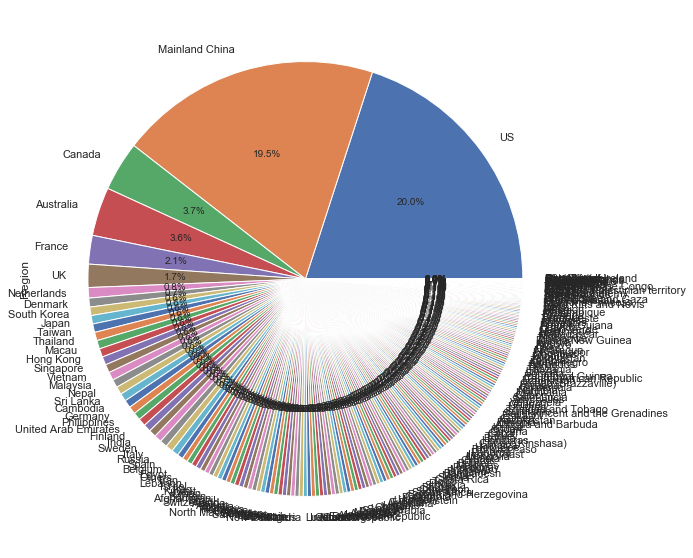

In [22]:
plt.figure(figsize=(20,10))
df['Region'].value_counts().plot.pie(autopct="%1.1f%%")

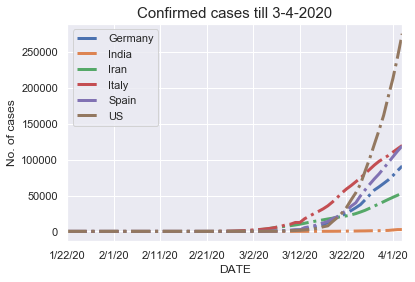

In [23]:
cnf_T.plot(linewidth=3,linestyle='-.')
plt.title('Confirmed cases till 3-4-2020',fontsize=15)
#plt.style.use('ggplot')
plt.ylabel('No. of cases')
plt.show()

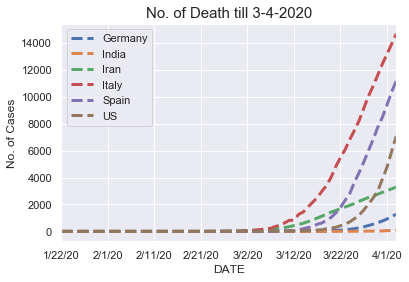

In [24]:
dth_T.plot(linewidth=3,linestyle='--')
plt.title('No. of Death till 3-4-2020',fontsize=15)
plt.ylabel('No. of Cases')
plt.show()

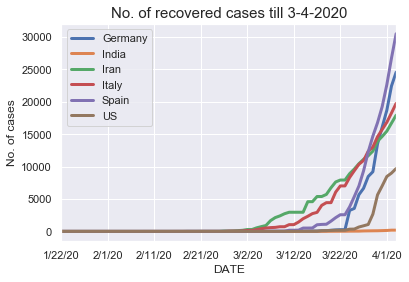

In [25]:
rec_T.plot(linewidth=3,linestyle='-')
plt.title('No. of recovered cases till 3-4-2020',fontsize=15)
plt.ylabel('No. of cases')
plt.show()

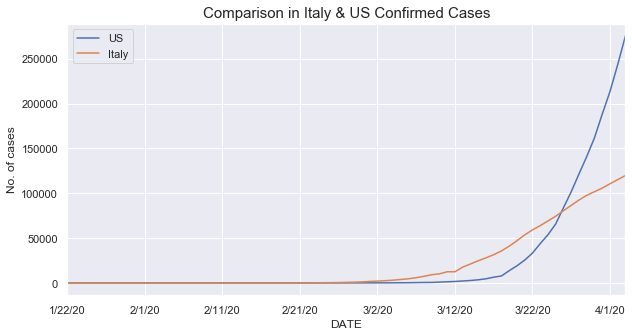

In [26]:
cnf_T[['US', 'Italy']].plot(kind='line',figsize=(10,5))
plt.title('Comparison in Italy & US Confirmed Cases',fontsize=15)
plt.ylabel('No. of cases')
plt.show()

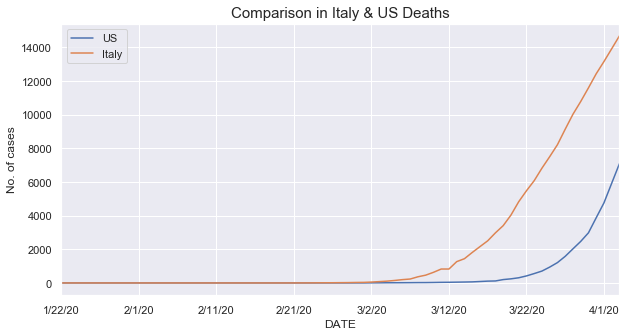

In [27]:
dth_T[['US', 'Italy']].plot(kind='line',figsize=(10,5))
plt.title('Comparison in Italy & US Deaths',fontsize=15)
plt.ylabel('No. of cases')
plt.show()

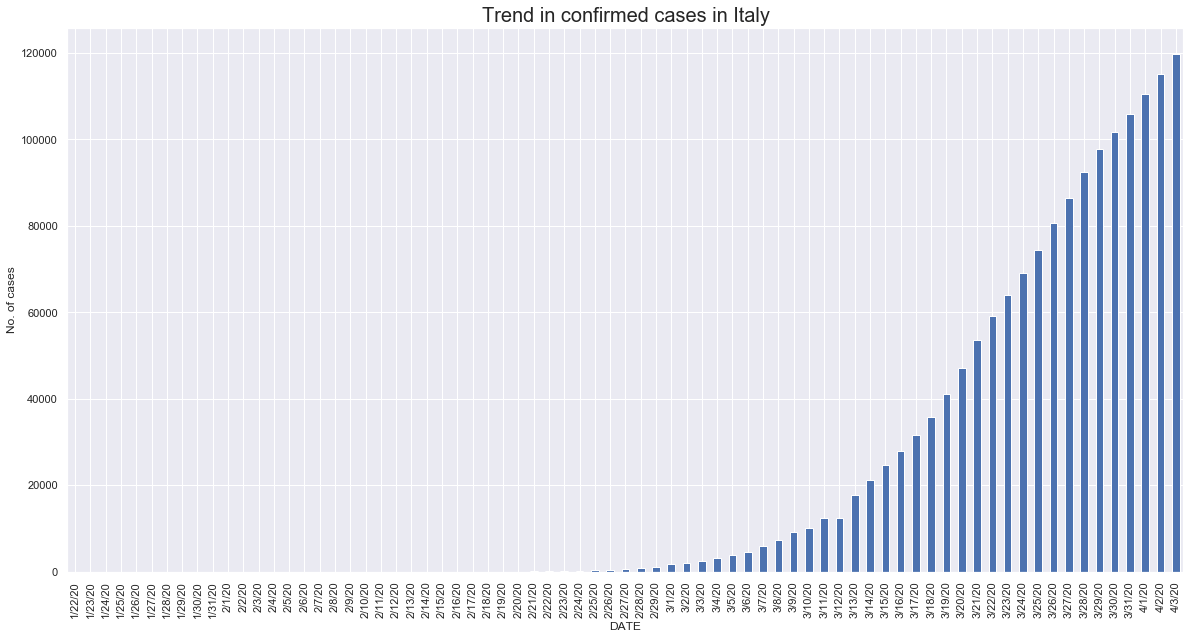

In [28]:
cnf_T['Italy'].plot(kind='bar',figsize=(20,10))
plt.title('Trend in confirmed cases in Italy',fontsize=20)
plt.ylabel('No. of cases')
plt.show()

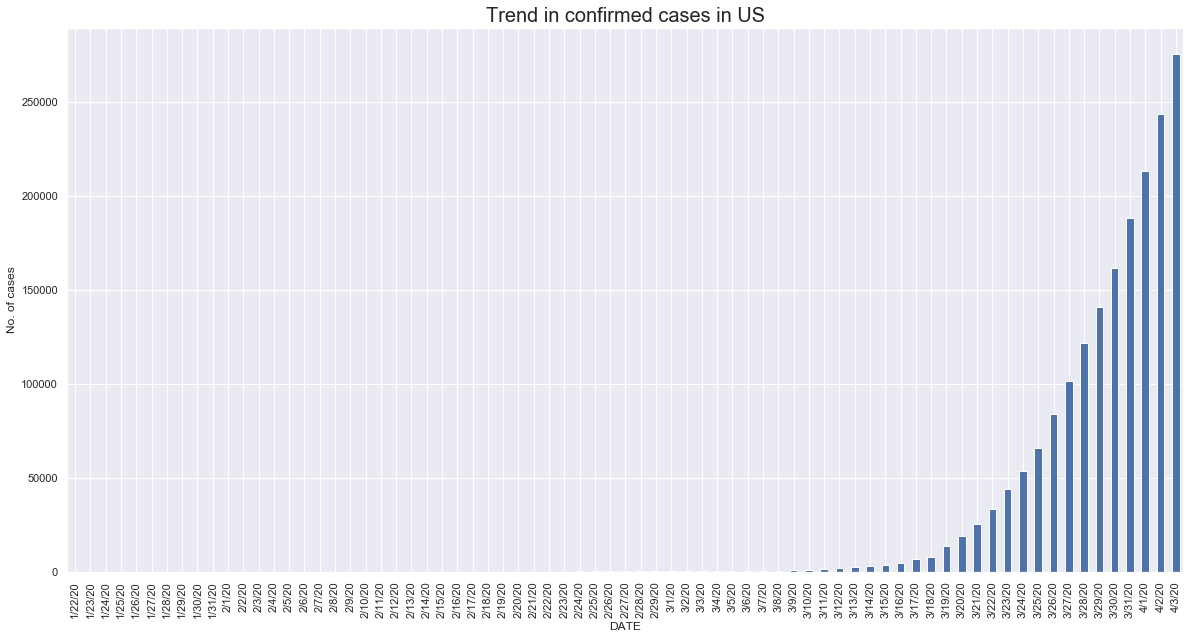

In [29]:
cnf_T['US'].plot(kind='bar',figsize=(20,10))
plt.title('Trend in confirmed cases in US',fontsize=20)
plt.ylabel('No. of cases')
plt.show()

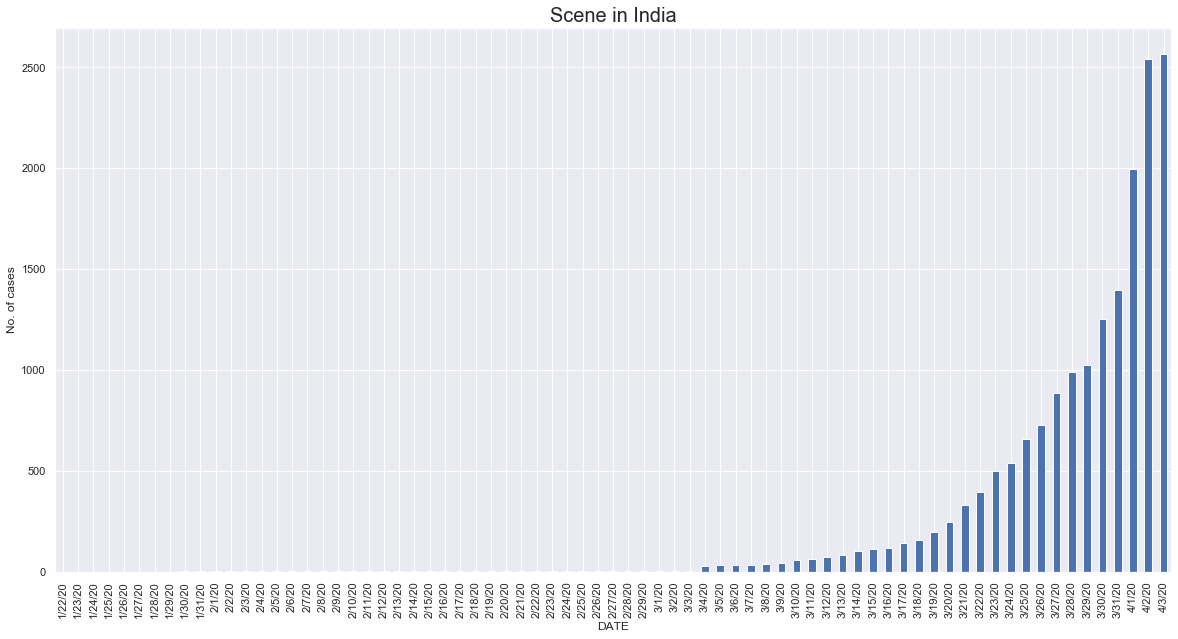

In [30]:
cnf_T['India'].plot(kind='bar',figsize=(20,10))
plt.title('Scene in India',fontsize=20)
plt.ylabel('No. of cases')
plt.show()

# Model Creation


Forecasting for Confirmed cases

In [31]:
confirm=df.groupby('Date').sum()['Confirmed'].reset_index()
confirm['Date']=pd.to_datetime(confirm['Date'])

confirm = confirm.rename(columns={'Date': 'ds','Confirmed': 'y'})
confirm.tail()
                         

,ds,y
68,2020-03-30,782365
69,2020-03-31,857487
70,2020-04-01,932605
71,2020-04-02,1013157
72,2020-04-03,1095917


In [32]:
from fbprophet import Prophet
p=Prophet(interval_width=0.95)
p.fit(confirm)
pred_dates=p.make_future_dataframe(periods=10)


Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
#pred_dates.tail()

In [34]:
forecast = p.predict(pred_dates)
forecast[['ds', 'yhat']].tail()

,ds,yhat
78,2020-04-09,1.344925e+06
79,2020-04-10,1.401412e+06
80,2020-04-11,1.447385e+06
81,2020-04-12,1.500510e+06
82,2020-04-13,1.554623e+06


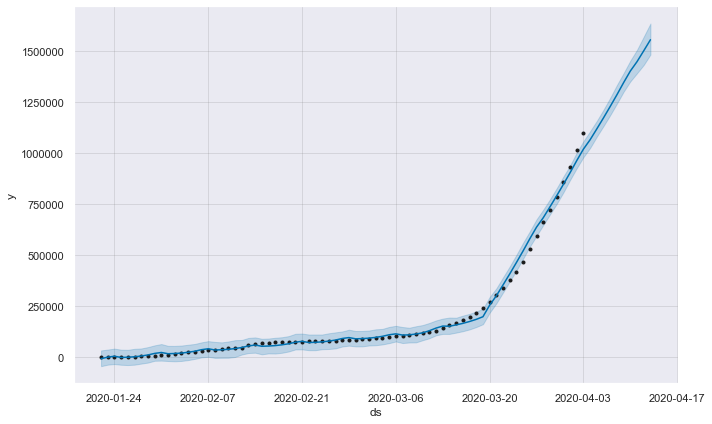

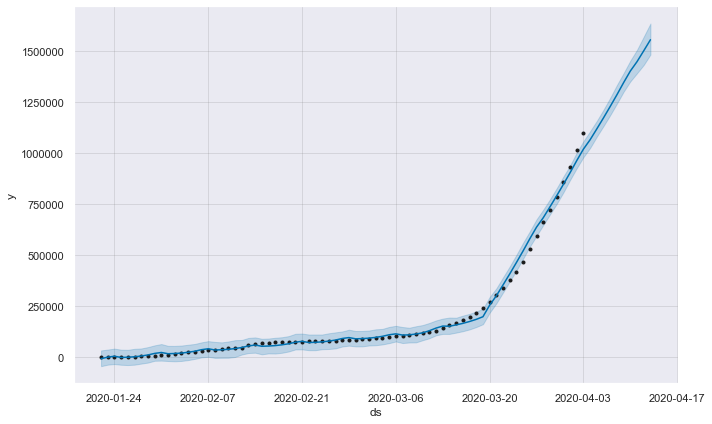

In [35]:
p.plot(forecast,uncertainty=True)

Forecasting for Deaths


In [36]:
deaths=df.groupby('Date').sum()['Deaths'].reset_index()
deaths['Date']=pd.to_datetime(deaths['Date'])

deaths = deaths.rename(columns={'Date': 'ds','Deaths': 'y'})
deaths.tail()
                         

,ds,y
68,2020-03-30,37582
69,2020-03-31,42107
70,2020-04-01,46809
71,2020-04-02,52983
72,2020-04-03,58787


In [37]:
from fbprophet import Prophet
d=Prophet(interval_width=0.95)
d.fit(deaths)
pred_dates1=d.make_future_dataframe(periods=10)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
forecast1 = d.predict(pred_dates1)
forecast1[['ds', 'yhat']].tail()

,ds,yhat
78,2020-04-09,68573.773162
79,2020-04-10,71649.160862
80,2020-04-11,73740.115170
81,2020-04-12,76579.690133
82,2020-04-13,79497.009578


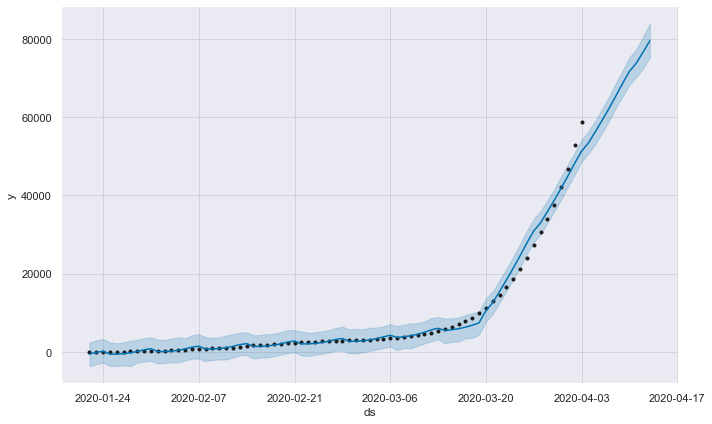

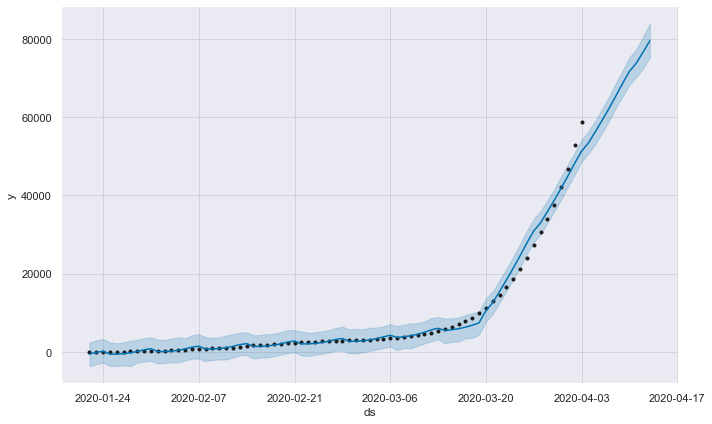

In [39]:
d.plot(forecast1,uncertainty=True)

Forecasting for Recovered

In [40]:
recover=df.groupby('Date').sum()['Recovered'].reset_index()
recover['Date']=pd.to_datetime(recover['Date'])

recover = recover.rename(columns={'Date': 'ds','Recovered': 'y'})
recover.tail()
                   

,ds,y
68,2020-03-30,164566
69,2020-03-31,178034
70,2020-04-01,193177
71,2020-04-02,210263
72,2020-04-03,225796


In [41]:
from fbprophet import Prophet
r=Prophet(interval_width=0.95)
r.fit(recover)
pred_dates2=r.make_future_dataframe(periods=10)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [42]:
forecast2 = r.predict(pred_dates2)
forecast2[['ds', 'yhat']].tail()

,ds,yhat
78,2020-04-09,245234.854040
79,2020-04-10,253215.985642
80,2020-04-11,258263.761758
81,2020-04-12,265989.328676
82,2020-04-13,273972.356535


In [43]:
Final_df=pd.DataFrame(forecast,columns=['ds','yhat'])
Final_df=Final_df.rename(columns={'ds':'Date','yhat':'Confirmed'})
Final_df['Deaths']=forecast1['yhat']
Final_df['Recovered']=forecast2['yhat']

In [44]:
Final_df.tail()

,Date,Confirmed,Deaths,Recovered
78,2020-04-09,1.344925e+06,68573.773162,245234.854040
79,2020-04-10,1.401412e+06,71649.160862,253215.985642
80,2020-04-11,1.447385e+06,73740.115170,258263.761758
81,2020-04-12,1.500510e+06,76579.690133,265989.328676
82,2020-04-13,1.554623e+06,79497.009578,273972.356535
